In [2]:
import numpy as np
from pommerman import constants
from scipy.stats import describe
# from matplotlib import pyplot as plt
# keep all outputs printed
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

labels = np.load('labels.npy')
labels.shape

print(np.sum(labels, axis=0) / len(labels)) # proportion of labels

Import error! You will not be able to render --> Cannot connect to "None"
[0.36810501 0.16168979 0.14268638 0.1558132  0.1535856  0.01812002]


In [2]:
# find how long each consequtive action took long
stop_action = (1,0,0,0,0,0)
up_action = (0,1,0,0,0,0)
down_action = (0,0,1,0,0,0)
left_action = (0,0,0,1,0,0)
right_action = (0,0,0,0,1,0)
bomb_action = (0,0,0,0,0,1)

def find_nonconseq_acts(event, labels): # our events are actions indeed
    matching_indices = np.where((labels == event).all(axis=1))[0]
    # for debugging purposes:
    # bound=30
    # print(matching_indices[:bound])
    #
    starts = []
    ends = []
    count =0
    prev_idx = -float('inf')
    for i, m in enumerate(matching_indices):
        if m-1 != prev_idx: # new stop action
            count += 1 # 
            starts.append(matching_indices[i]) # or just 'm'
            if prev_idx != -float('inf'):
                ends.append(matching_indices[i-1]) # add the end point of the previous action (i.e. stop action)
        prev_idx=m
        # if i >= bound: # for debug purpose
        # break
    ends.append(matching_indices[i]) # because last m is skipped from the above logic
    #
    # for debugging purposes:
    #print(starts[-10:])
    #print(ends[-10:])
    #print(starts[:10])
    #print(ends[:10])
    #print(count) # number of non-consequative stops
    #print(len(starts)) # starts length
    #print(len(ends)) # ends length
    assert len(ends) == len(starts) # nr starts and ends must match up
    #
    event_length = [] # length of steps that consequetive stop action executed
    for i in range(count):
        event_length.append(ends[i]-starts[i])
    return matching_indices, count, starts, ends, np.array(event_length)
    

_, count1, starts1, ends1, stop_length = find_nonconseq_acts(stop_action, labels)
_, count2, starts2, ends2, up_length = find_nonconseq_acts(up_action, labels)
_, count3, starts3, ends3, down_length = find_nonconseq_acts(down_action, labels)
_, count4, starts4, ends4, left_length = find_nonconseq_acts(left_action, labels)
_, count5, starts5, ends5, right_length = find_nonconseq_acts(right_action, labels)
_, count6, starts6, ends6, bomb_length = find_nonconseq_acts(bomb_action, labels)

np.sum(labels, axis=0)
count1, count2, count3, count4, count5, count6
print("fraction of non-consequetive actions to the total action of same type: ")
count1/np.sum(labels, axis=0)[0]
count2/np.sum(labels, axis=0)[1]
count3/np.sum(labels, axis=0)[2]
count4/np.sum(labels, axis=0)[3]
count5/np.sum(labels, axis=0)[4]
count6/np.sum(labels, axis=0)[5]

# get further insight:
describe(stop_length)
describe(up_length)
describe(down_length)
describe(left_length)
describe(right_length)
describe(bomb_length)

array([462528., 203165., 179287., 195781., 192982.,  22768.],
      dtype=float32)

(55089, 125816, 122752, 128901, 129983, 22766)

fraction of non-consequetive actions to the total action of same type: 


0.1191041407222914

0.6192798956513179

0.6846675999933068

0.65839381758189

0.6735498647542257

0.9999121574139143

DescribeResult(nobs=55089, minmax=(0, 5001), mean=7.396013723247835, variance=6621.879802581573, skewness=28.560857563584648, kurtosis=955.164186817008)

DescribeResult(nobs=125816, minmax=(0, 2348), mean=0.6147787244865518, variance=231.51467218089806, skewness=142.94538599870938, kurtosis=20755.195644072355)

DescribeResult(nobs=122752, minmax=(0, 77), mean=0.4605627606882169, variance=1.089938854465476, skewness=10.731386715179307, kurtosis=453.64226485584123)

DescribeResult(nobs=128901, minmax=(0, 2258), mean=0.5188477979224366, variance=115.88275763595766, skewness=198.65357676358533, kurtosis=40470.67031644485)

DescribeResult(nobs=129983, minmax=(0, 2107), mean=0.4846710723710024, variance=35.77240854204198, skewness=336.5572744085881, kurtosis=118390.12801766061)

DescribeResult(nobs=22766, minmax=(0, 1), mean=8.785030308354564e-05, variance=8.784644407616218e-05, skewness=106.67708323655101, kurtosis=11378.00008785804)

In [3]:
# beg = 20
# end = 80
# plt.figure(figsize=(17,7))
# plt.bar(range(beg,end), stop_length[beg:end])
# plt.bar(range(beg,end), down_length[beg:end])
# plt.bar(range(beg,end), left_length[beg:end])
# plt.bar(range(beg,end), right_length[beg:end])
# plt.bar(range(beg,end), bomb_length[beg:end])
# plt.legend(['stop', 'up', 'down', 'left', 'right', 'bomb'])
# plt.show()

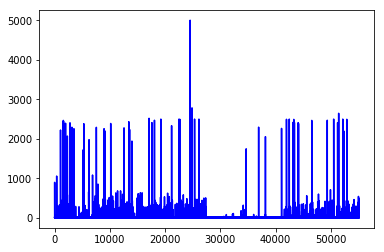

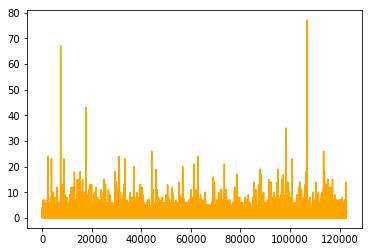

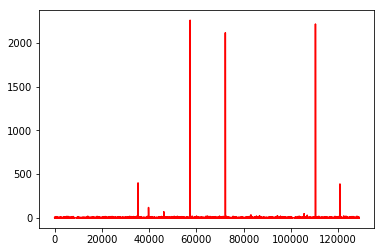

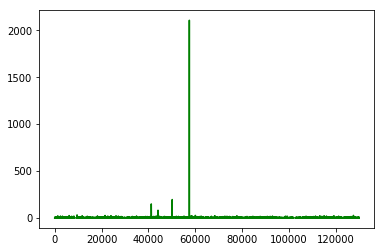

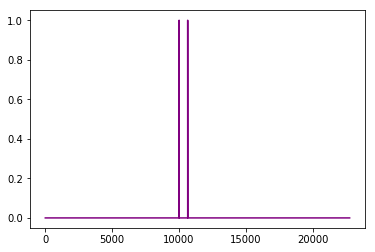

In [4]:
# the plots show the crappy actions (very lengthy one)
# it seems the SimpleAgent crashed to some deadlock or freezed because of some crappy heuristic?
beg = 0
end = -1
plt.plot(stop_length[beg:end], 'blue')
plt.show()
plt.plot(down_length[beg:end], 'orange')
plt.show()
plt.plot(left_length[beg:end], 'red')
plt.show()
plt.plot(right_length[beg:end], 'green')
plt.show()
plt.plot(bomb_length[beg:end], 'purple')
plt.show()

In [3]:
def pick_idx(action_lengths, starts, ends):
    picked = np.empty(0)
    thresh = 10 # bomb life is also 10 - it seems to be a reasonable threshold .. 
                # .. for any action to be executed for this duration max
    for i, al in enumerate(action_lengths):
        if al == 0: # pick non-consequetive (=0)
            picked = np.append(picked, starts[i])
        elif al <= 10: # pick consequetive (<=thresh)
            picked = np.append(picked, np.arange(starts[i], ends[i]+1))
        else: # sample from consequetive actions longer than the threshold
            n = thresh + 5
            nr_samples = n if n < al else al
            sampled = np.random.choice(range(starts[i], ends[i]+1), nr_samples, replace=False)
            picked = np.append(picked, sampled)
        #print(len(picked))
    return picked


_, _, starts, ends, stop_length = find_nonconseq_acts(stop_action, labels)
stop_picked = pick_idx(stop_length, starts, ends)

_, _, starts, ends, up_length = find_nonconseq_acts(up_action, labels)
up_picked = pick_idx(up_length, starts, ends)

_, _, starts, ends, down_length = find_nonconseq_acts(down_action, labels)
down_picked = pick_idx(down_length, starts, ends)

_, _, starts, ends, left_length = find_nonconseq_acts(left_action, labels)
left_picked = pick_idx(left_length, starts, ends)

_, _, starts, ends, right_length = find_nonconseq_acts(right_action, labels)
right_picked = pick_idx(right_length, starts, ends)

_, _, starts, ends, bomb_length = find_nonconseq_acts(bomb_action, labels)
bomb_picked = pick_idx(bomb_length, starts, ends)


len(stop_picked)
len(up_picked)
len(down_picked)
len(left_picked)
len(right_picked)
len(bomb_picked)

all_picked = np.concatenate([stop_picked, up_picked, down_picked, left_picked, right_picked, bomb_picked])
# make sure don't have duplicate indices otherwise something's wrong with the perofrmed process
assert len(np.unique(all_picked)) == len(all_picked) 

177518

188327

178878

187966

190063

22768

In [4]:
# some stats
print("picked indices: %i out of %i labels" % (len(all_picked), len(labels)) )
print("before: ", np.sum(labels, axis=0) / len(labels)) # proportion of labels
picked_indices = np.sort(all_picked.astype('int'))
y = labels[picked_indices]
print("afterr: ", np.sum(y, axis=0) / len(y)) # proportion of picked labels -> make sure it is more balanced now

# make sure the original order preserved (although it may not matter that much!)
# y[:10]
# labels[:10]

picked indices: 945520 out of 1256511 labels
before:  [0.36810501 0.16168979 0.14268638 0.1558132  0.1535856  0.01812002]
afterr:  [0.18774643 0.19917823 0.18918479 0.19879643 0.20101426 0.02407987]


In [4]:
obs = np.load('obs.npy')

ValueError: 14 is not a valid Item

In [8]:
obs_picked = obs[picked_indices]
assert len(y) == len(obs_picked)
np.save('dataset/labels_balanced.npy', y)
np.save('dataset/obs_balanced.npy', obs_picked)

In [9]:
# obs_quarter = obs[:len(obs)//4,:]
len(obs_picked) // 4

y_2 = y[:len(y) // 4]
obs_2 = obs_picked[:len(y) // 4]

print("y_2 len: ", len(y_2))
print("obs_2 len: ", len(obs_2))

np.save('dataset/labels_small.npy', y)
np.save('dataset/obs_small.npy', obs_2)

236380

y_2 len:  236380
obs_2 len:  236380
